# Explore: DUC Analytica Data

**GOAL:**
Analyze the data
1. Summarize the Data by looking at the data structure and the data distributions
2. Vizualize the data by looking at the attribute histograms and pairwise scatterplots of different attributes

## Imports
Import the necessary packages and their use cases for this project:

> pandas: data frames and data manipulation  
> numpy: summary statistics  
> matplotlib: used for visualizations  
> seasborn: fancy visualizations    
> pprint: Provides a capability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from acquire_prepare import acquire_oil
from acquire_prepare import prep_data
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys # used in command to make entire array print by default

# import explore
from explore import df_summary
from explore import xgb_rank

# Feature Selection
# import xgboost as xgb
# from sklearn.decomposition import PCA

In [2]:
'''
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
'''

'\n%%javascript\nIPython.OutputArea.prototype._should_scroll = function(lines) {\n    return false;\n}\n'

In [3]:
# makes entire array print by default, 
# can add [:##] to end to set length
np.set_printoptions(threshold=sys.maxsize)

In [4]:
df = acquire_oil()

In [6]:
df = prep_data(df)

# Summarize Data

In [7]:
df_summary(df)

--- Shape: (7808, 60)
--- Info
<class 'pandas.core.frame.DataFrame'>
Index: 7808 entries, 30 to 17155
Data columns (total 60 columns):
api14                      7808 non-null int64
lease_name                 7808 non-null object
well_number                7808 non-null object
county                     7808 non-null object
direction                  7808 non-null category
status                     7808 non-null category
oper                       7808 non-null object
multi_well_lease           7808 non-null bool
major_phase                7808 non-null category
formation                  7808 non-null object
proppant_ppf               7808 non-null float64
prod_method                7808 non-null category
frac_fluid_gpf             7808 non-null float64
gross_perfs                7808 non-null float64
frac_stages                7808 non-null float64
frac_fluid_type            7808 non-null category
first_prod                 7808 non-null datetime64[ns]
last_prod                  780

api14                      7793
lease_name                 3513
well_number                3164
county                       38
direction                     2
status                        2
oper                        265
multi_well_lease              2
major_phase                   3
formation                    38
proppant_ppf               7706
prod_method                   9
frac_fluid_gpf             7739
gross_perfs                4439
frac_stages                  62
frac_fluid_type               9
first_prod                  413
last_prod                   289
oil_gravity                 128
peak_boepd                 7616
oil_hist                   7693
gas_hist                   7689
gor_hist                   7799
ip90_boeqpd                7698
tvd                        3920
sur_lat                    7604
sur_long                   7755
well_id                    7801
mid_point_lat              7788
mid_point_long             7792
sub_basin                     3
recovery

### Data Information

In [8]:
df.describe()

,api14,proppant_ppf,frac_fluid_gpf,gross_perfs,frac_stages,oil_gravity,peak_boepd,oil_hist,gas_hist,gor_hist,...,scaled_proppant_ppf,scaled_frac_fluid_gpf,scaled_gross_perfs,scaled_frac_stages,scaled_oil_gravity,scaled_gor_hist,scaled_tvd,scaled_mid_point_lat,scaled_mid_point_long,scaled_vintage
count,7.808000e+03,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,...,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000,7808.000000
mean,4.219527e+13,1126.363018,1139.637575,5714.406122,3.190958,1.789752,499.572918,117.627859,378.657241,3898.238576,...,0.283564,0.380075,0.420594,0.045585,0.026320,0.195214,0.518904,0.392766,0.648471,0.895012
std,1.052720e+12,657.277032,714.603620,2945.678984,9.298670,9.023952,429.076835,92.415101,373.556729,3824.164501,...,0.165632,0.238398,0.216961,0.132838,0.132705,0.191515,0.255225,0.145537,0.207242,0.137293
min,3.000528e+13,1.098097,0.354610,4.000000,0.000000,0.000000,0.663017,0.031000,0.001000,0.212134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.217337e+13,519.534905,495.626639,4038.500000,0.000000,0.000000,157.631012,45.904250,108.771250,1424.285762,...,0.130645,0.165227,0.297157,0.000000,0.000000,0.071318,0.460455,0.279063,0.580875,0.900000
50%,4.231739e+13,1153.524900,1218.845095,6216.500000,0.000000,0.000000,423.426966,100.100500,280.955500,2494.749230,...,0.290409,0.406499,0.457575,0.000000,0.000000,0.124927,0.588767,0.383042,0.697412,0.933333
75%,4.238338e+13,1594.000000,1648.834110,7713.000000,0.000000,0.000000,722.864245,170.253000,536.150250,4925.432130,...,0.401408,0.549947,0.567798,0.000000,0.000000,0.246657,0.693334,0.478112,0.798080,0.950000
max,4.250137e+13,3969.384520,2997.879640,13581.000000,70.000000,68.000000,3412.144780,754.662000,3677.494000,19968.130000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualize Data: Hypothesis Visualization

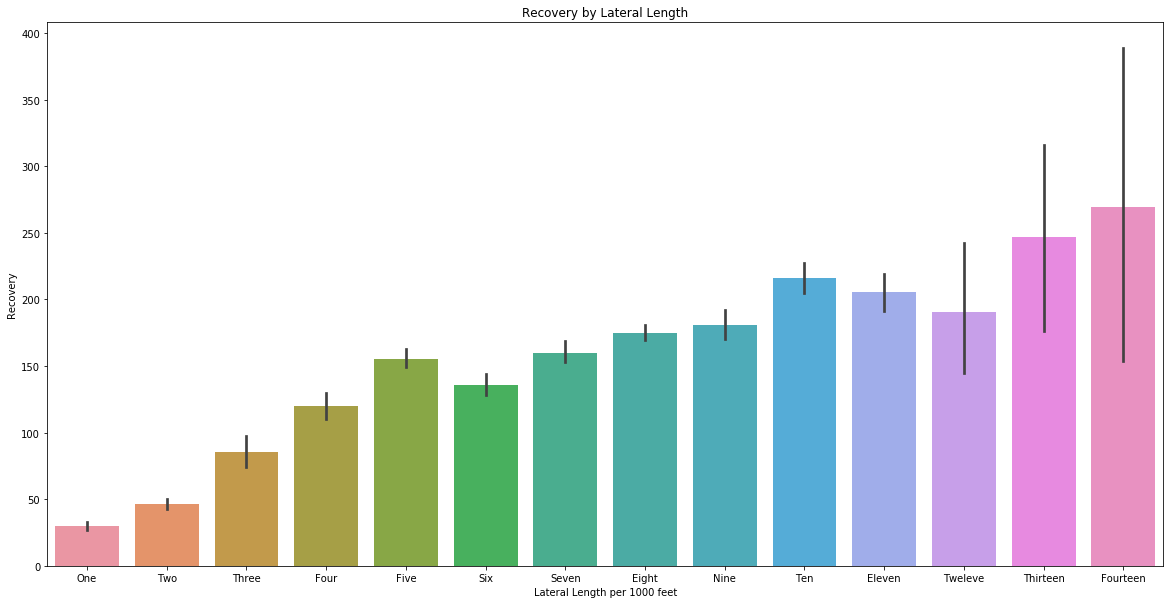

In [9]:
plt.figure(figsize=(20,10))
sns.barplot(x= df.lateral_class.sort_values(), y='recovery', data=df)

group_labels = ['One', 'Two', 'Three', 'Four', 'Five',
        'Six', 'Seven', 'Eight', 'Nine', 'Ten',
        'Eleven', 'Tweleve', 'Thirteen', 'Fourteen']

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], group_labels)

plt.title('Recovery by Lateral Length')
plt.xlabel('Lateral Length per 1000 feet')
plt.ylabel('Recovery')

plt.show()

#### Call xgb_rank to create the feature_list, scaled_features list, and the importance_df.

In [10]:
feature_list, scaled_features, importance_df = xgb_rank(df,df.recovery,feature_percent=80,mode='gain')

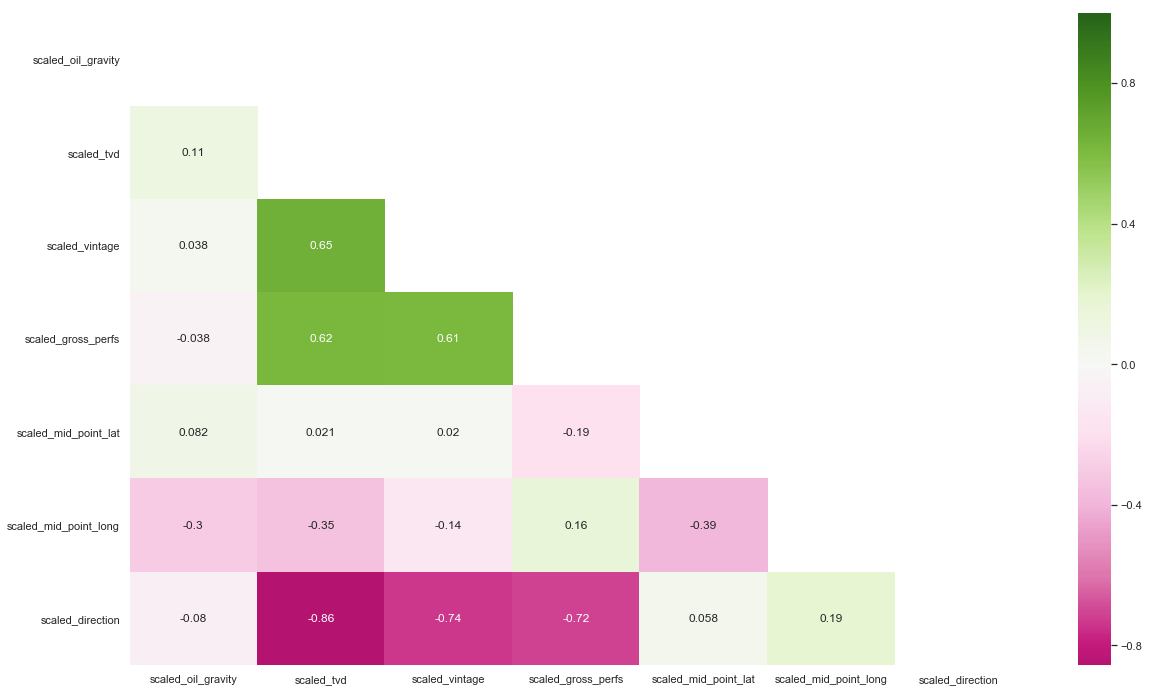

In [11]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[scaled_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='PiYG', annot=True, center=0)

### Attribute Histograms

In [12]:
feature_list

['oil_gravity',
 'tvd',
 'vintage',
 'gross_perfs',
 'mid_point_lat',
 'mid_point_long',
 'direction']

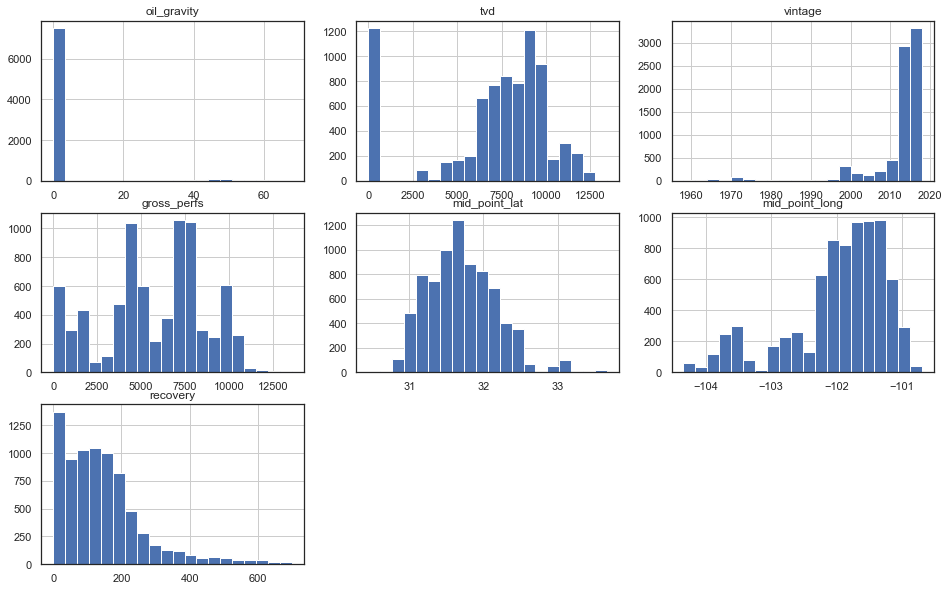

In [13]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(feature_list[:6]+['recovery']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    series.hist(bins=20)

#### Could not get direction to plot.

In [14]:
# df['direction'].hist()

### Pairwise Scatterplots

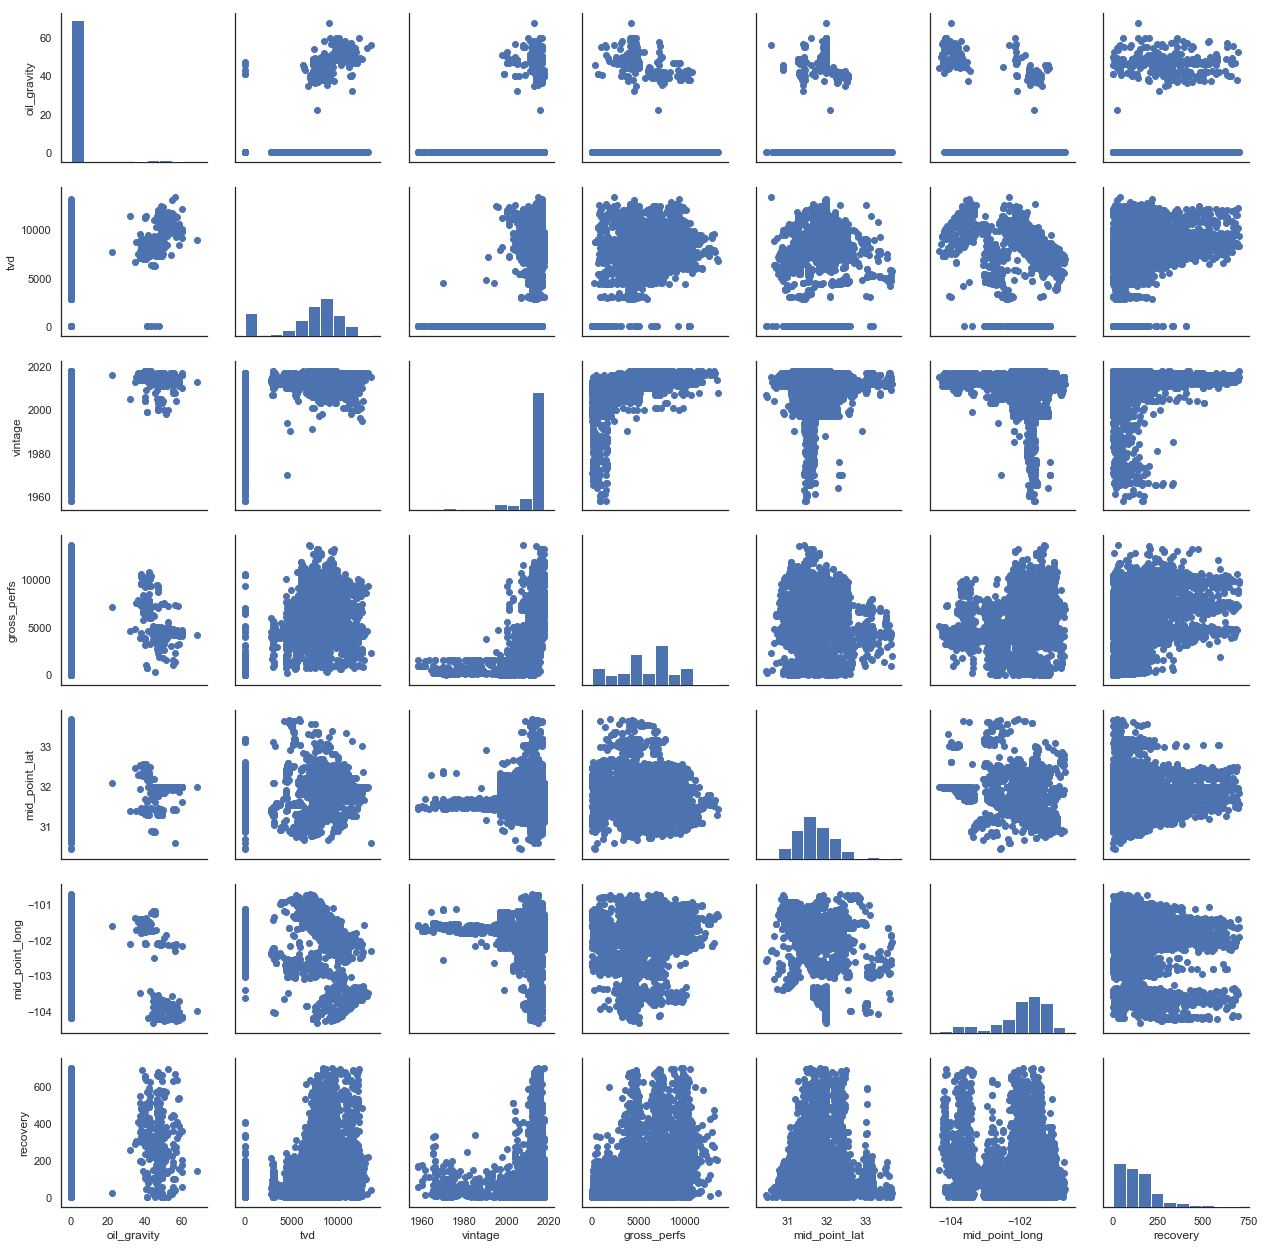

In [15]:
g = sns.PairGrid(df, vars=['oil_gravity', 'tvd', 'vintage', 'gross_perfs', 
                           'mid_point_lat', 'mid_point_long', 'recovery'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)